In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules

In [2]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv(r"C:\Users\dell\Desktop\assignment\my_movies.csv")

In [4]:
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [5]:
data = df.iloc[:,5:]
data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [6]:
count = data.sum()
count

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

In [7]:
data.shape

(10, 10)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [9]:
data.value_counts()

Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  Harry Potter2  LOTR  Braveheart  Green Mile
1            1          0      0              1        0      0              0     0           0             4
0            0          0      1              0        0      1              0     0           0             1
                        1      0              0        1      0              0     0           0             1
             1          0      0              1        0      0              0     0           0             1
                                                                                   1           0             1
1            0          1      1              0        1      0              0     0           1             1
             1          0      0              0        0      0              1     0           1             1
dtype: int64

In [10]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print()

Sixth Sense
1    6
0    4
Name: Sixth Sense, dtype: int64

Gladiator
1    7
0    3
Name: Gladiator, dtype: int64

LOTR1
0    8
1    2
Name: LOTR1, dtype: int64

Harry Potter1
0    8
1    2
Name: Harry Potter1, dtype: int64

Patriot
1    6
0    4
Name: Patriot, dtype: int64

LOTR2
0    8
1    2
Name: LOTR2, dtype: int64

Harry Potter2
0    9
1    1
Name: Harry Potter2, dtype: int64

LOTR
0    9
1    1
Name: LOTR, dtype: int64

Braveheart
0    9
1    1
Name: Braveheart, dtype: int64

Green Mile
0    8
1    2
Name: Green Mile, dtype: int64



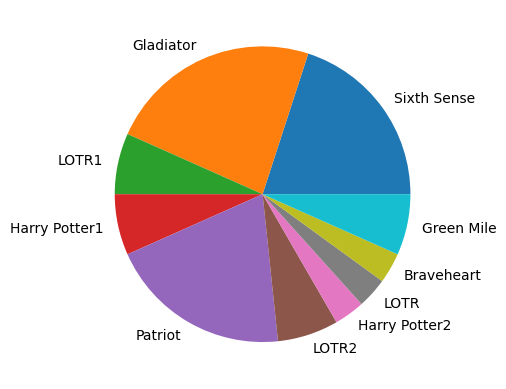

In [11]:
plt.figsize=(12,10)
plt.pie(data.sum(),labels=data.columns)
plt.show()

## Support

In [12]:
first = pd.DataFrame(data.sum() / data.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2
Harry Potter2,0.1
LOTR,0.1
Braveheart,0.1


In [13]:
## on the above data we do the iteration
# first iteration

In [14]:
# get support value >=0.1
first[first.Support >= 0.1]

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2
Harry Potter2,0.1
LOTR,0.1
Braveheart,0.1


In [15]:
## get support value >= 0.15

In [16]:
first[first.Support >=0.15]

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2


In [17]:
## get support value >=0.20 

In [18]:
first[first.Support >=0.20]

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2


In [19]:
### second iteration

In [20]:
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]
# Sample of combinations
second[:10]

[['Gladiator', 'Sixth Sense'],
 ['Gladiator', 'Patriot'],
 ['Gladiator', 'LOTR1'],
 ['Gladiator', 'Harry Potter1'],
 ['Gladiator', 'LOTR2'],
 ['Gladiator', 'Green Mile'],
 ['Gladiator', 'Harry Potter2'],
 ['Gladiator', 'LOTR'],
 ['Gladiator', 'Braveheart'],
 ['Sixth Sense', 'Patriot']]

In [21]:
value = []
for i in range(0, len(second)):
    temp = data.T.loc[second[i]].sum() 
    temp = len(temp[temp == data.T.loc[second[i]].shape[0]]) / data.shape[0]
    value.append(temp)
# Create a data frame            
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(Gladiator, Patriot)",0.6,2
"(Gladiator, Sixth Sense)",0.5,2
"(Sixth Sense, Patriot)",0.4,2
"(Sixth Sense, Green Mile)",0.2,2
"(LOTR1, LOTR2)",0.2,2


In [22]:
second = list(itertools.combinations(first.index, 3))
second = [list(i) for i in second]
# Sample of combinations
second[:10]

[['Gladiator', 'Sixth Sense', 'Patriot'],
 ['Gladiator', 'Sixth Sense', 'LOTR1'],
 ['Gladiator', 'Sixth Sense', 'Harry Potter1'],
 ['Gladiator', 'Sixth Sense', 'LOTR2'],
 ['Gladiator', 'Sixth Sense', 'Green Mile'],
 ['Gladiator', 'Sixth Sense', 'Harry Potter2'],
 ['Gladiator', 'Sixth Sense', 'LOTR'],
 ['Gladiator', 'Sixth Sense', 'Braveheart'],
 ['Gladiator', 'Patriot', 'LOTR1'],
 ['Gladiator', 'Patriot', 'Harry Potter1']]

In [23]:
value = []
for i in range(0, len(second)):
    temp = data.T.loc[second[i]].sum() 
    temp = len(temp[temp == data.T.loc[second[i]].shape[0]]) / data.shape[0]
    value.append(temp)
# Create a data frame            
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(Gladiator, Sixth Sense, Patriot)",0.4,3


## Association Rules

## Association rules with 10% Support and 30% confidence

In [24]:
frequent_itemsets=apriori(data,min_support=0.1,use_colnames=True)
frequent_itemsets['length']= frequent_itemsets['itemsets'].apply(lambda x:len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


In [25]:
rules=association_rules(frequent_itemsets,metric='confidence',min_threshold=0.3)

In [26]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
...,...,...,...,...,...,...,...,...,...,...
212,"(Harry Potter1, Sixth Sense)","(LOTR2, LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
213,(LOTR2),"(LOTR1, Harry Potter1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
214,(Green Mile),"(LOTR2, Harry Potter1, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
215,(LOTR1),"(LOTR2, Harry Potter1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


In [27]:
rules.head(150)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
...,...,...,...,...,...,...,...,...,...,...
145,(LOTR1),"(Green Mile, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
146,(Harry Potter1),"(Green Mile, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
147,(Green Mile),"(Harry Potter1, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
148,"(LOTR2, Green Mile, LOTR1)",(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444


In [28]:
rules.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
180,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
168,"(Green Mile, Harry Potter1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
93,"(Harry Potter1, LOTR1)",(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889
94,"(Green Mile, LOTR1)",(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889
95,"(Green Mile, Harry Potter1)",(LOTR1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889
...,...,...,...,...,...,...,...,...,...,...
76,"(Green Mile, Sixth Sense)",(LOTR),0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
73,(Green Mile),"(LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
72,(LOTR2),"(Green Mile, Sixth Sense)",0.2,0.2,0.1,0.500000,2.500000,0.06,1.6,0.750000
216,(Harry Potter1),"(LOTR2, LOTR1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


In [29]:
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
5,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
7,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
212,"(Harry Potter1, Sixth Sense)","(LOTR2, LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
213,(LOTR2),"(LOTR1, Harry Potter1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
214,(Green Mile),"(LOTR2, Harry Potter1, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
215,(LOTR1),"(LOTR2, Harry Potter1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


## Recommondation

In [30]:
## rules for row 2

In [31]:
data['Sixth Sense'].sum()

6

In [32]:
data['Patriot'].sum()

6

In [33]:
## rules for row 215

In [34]:
data['Sixth Sense'].sum(),data['Patriot'].sum()

(6, 6)

In [35]:
data['Gladiator'].sum()

7

## Visualization of obtained rule 

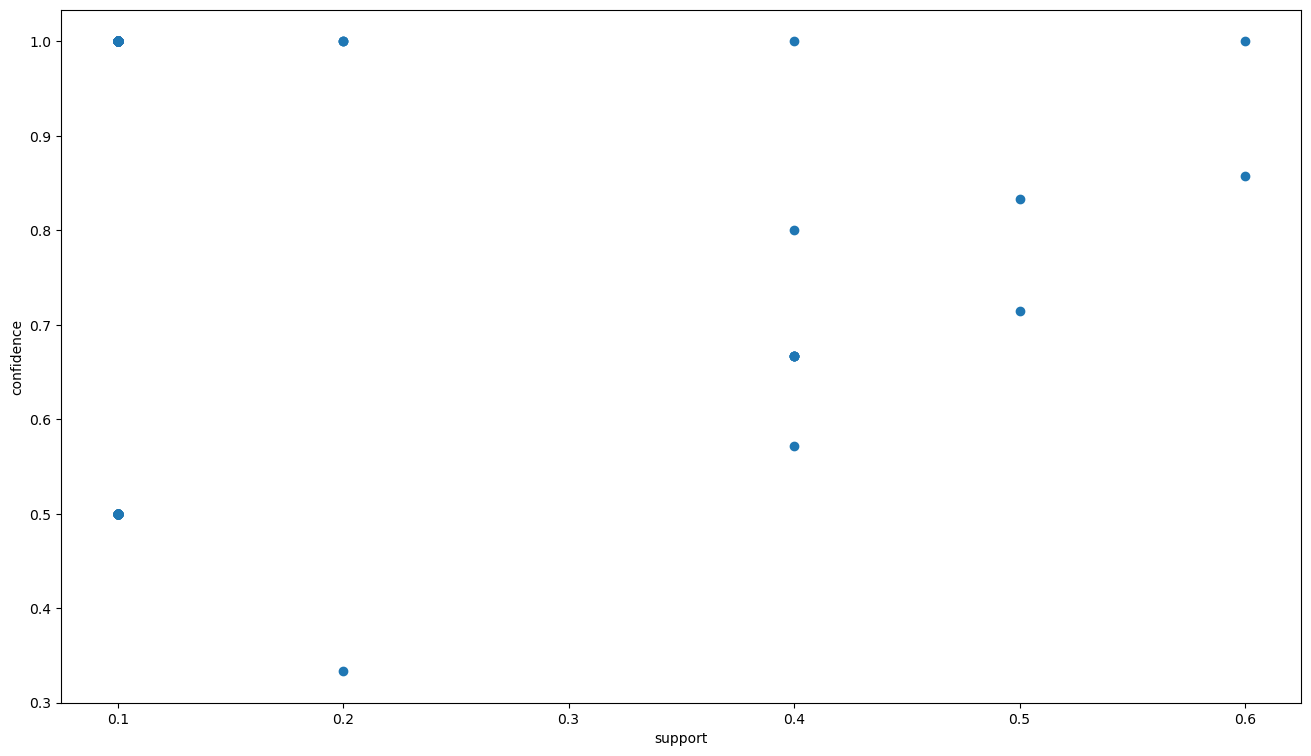

In [36]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

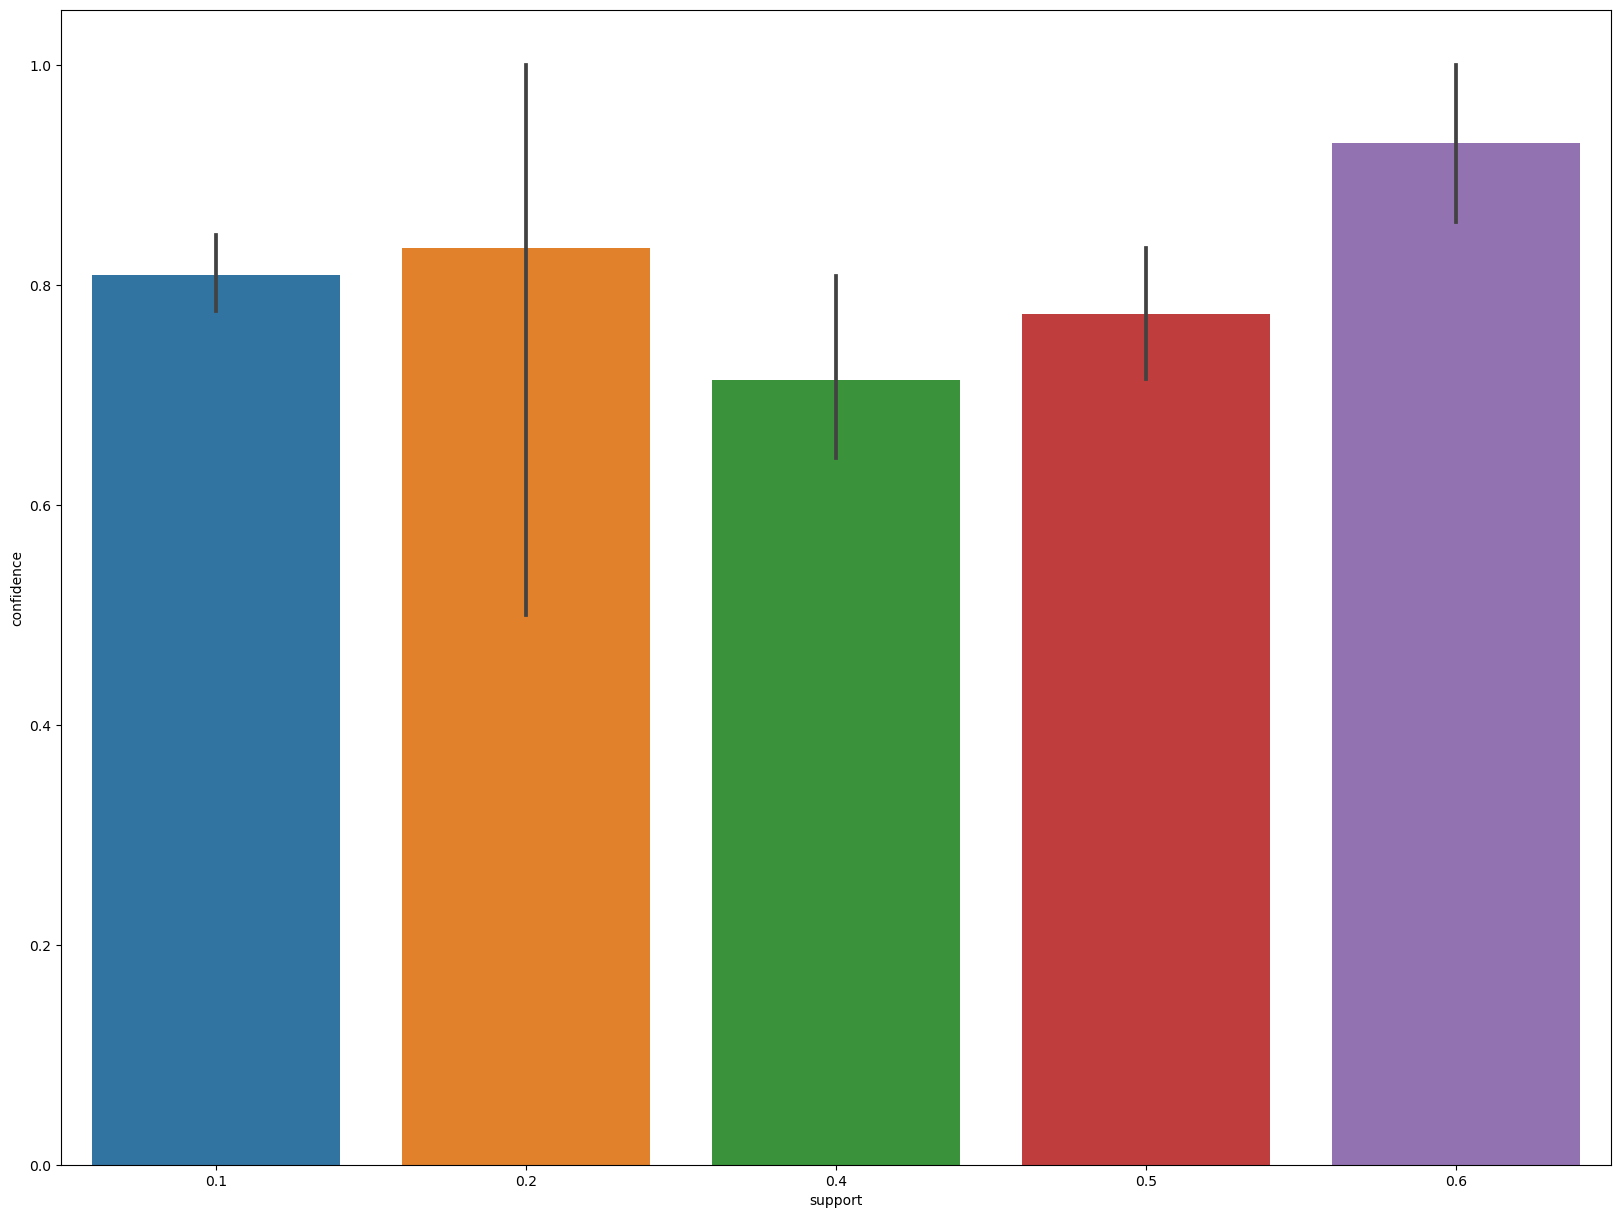

In [37]:
plt.figure(figsize=(20,15))
sns.barplot(x='support', y="confidence",  data=lift);

## Association rules with 15% Support and 40% confidence

In [38]:
frequent_itemsets=apriori(data,min_support=0.15,use_colnames=True)
frequent_itemsets['length']= frequent_itemsets['itemsets'].apply(lambda x:len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Sixth Sense, Gladiator)",2
8,0.4,"(Sixth Sense, Patriot)",2
9,0.2,"(Green Mile, Sixth Sense)",2


In [39]:
rules=association_rules(frequent_itemsets,metric='confidence',min_threshold=0.4)

In [40]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000


In [41]:
rules.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
11,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


In [42]:
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000


## Recommondation

In [43]:
## rule for zero 1

In [44]:
data['Gladiator'].sum()

7

In [45]:
data['Sixth Sense'].sum()

6

In [46]:
## rule for 4

In [47]:
data['Green Mile'].sum(),data['Sixth Sense'].sum()

(2, 6)

## Visualization of obtained rule

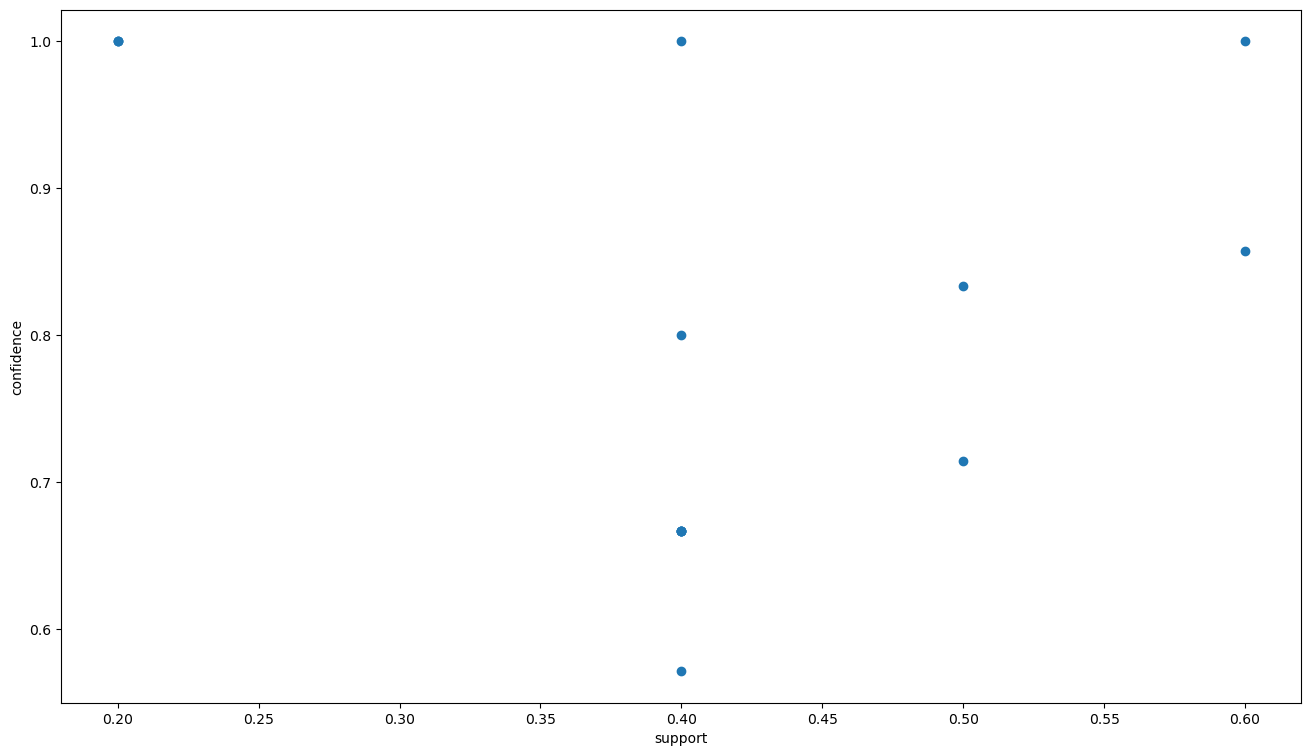

In [48]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

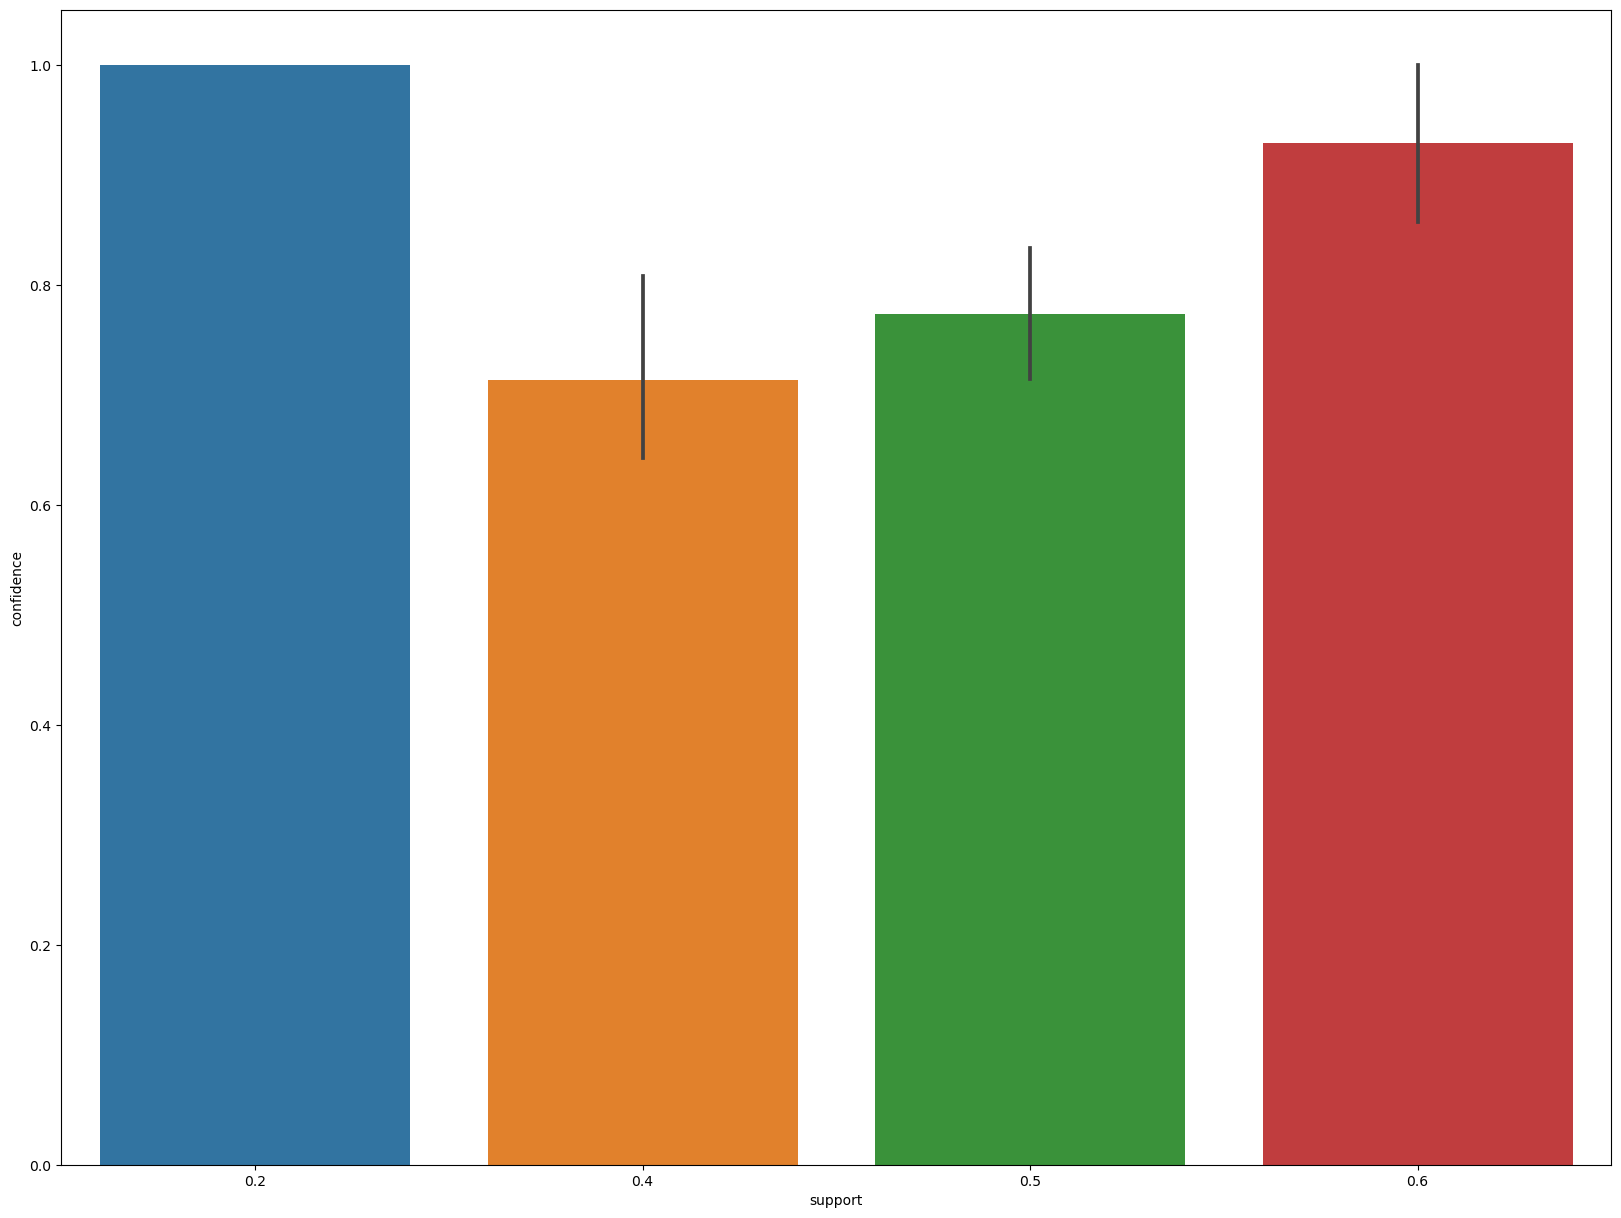

In [49]:
plt.figure(figsize=(20,15))
sns.barplot(x='support', y="confidence",  data=lift);

## Association rules with 20% Support and 60% confidence

In [50]:
frequent_itemsets=apriori(data,min_support=0.20,use_colnames=True)
frequent_itemsets['length']= frequent_itemsets['itemsets'].apply(lambda x:len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Sixth Sense, Gladiator)",2
8,0.4,"(Sixth Sense, Patriot)",2
9,0.2,"(Green Mile, Sixth Sense)",2


In [51]:
rules=association_rules(frequent_itemsets,metric='confidence',min_threshold=0.6)

In [52]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000


In [53]:
rules.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
11,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


In [54]:
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000


## Recommondation

In [55]:
## rule for row 11
data['Patriot'].sum()

6

In [56]:
data['Gladiator'].sum(),data['Sixth Sense'].sum()

(7, 6)

## Visualization of obtained rule¶

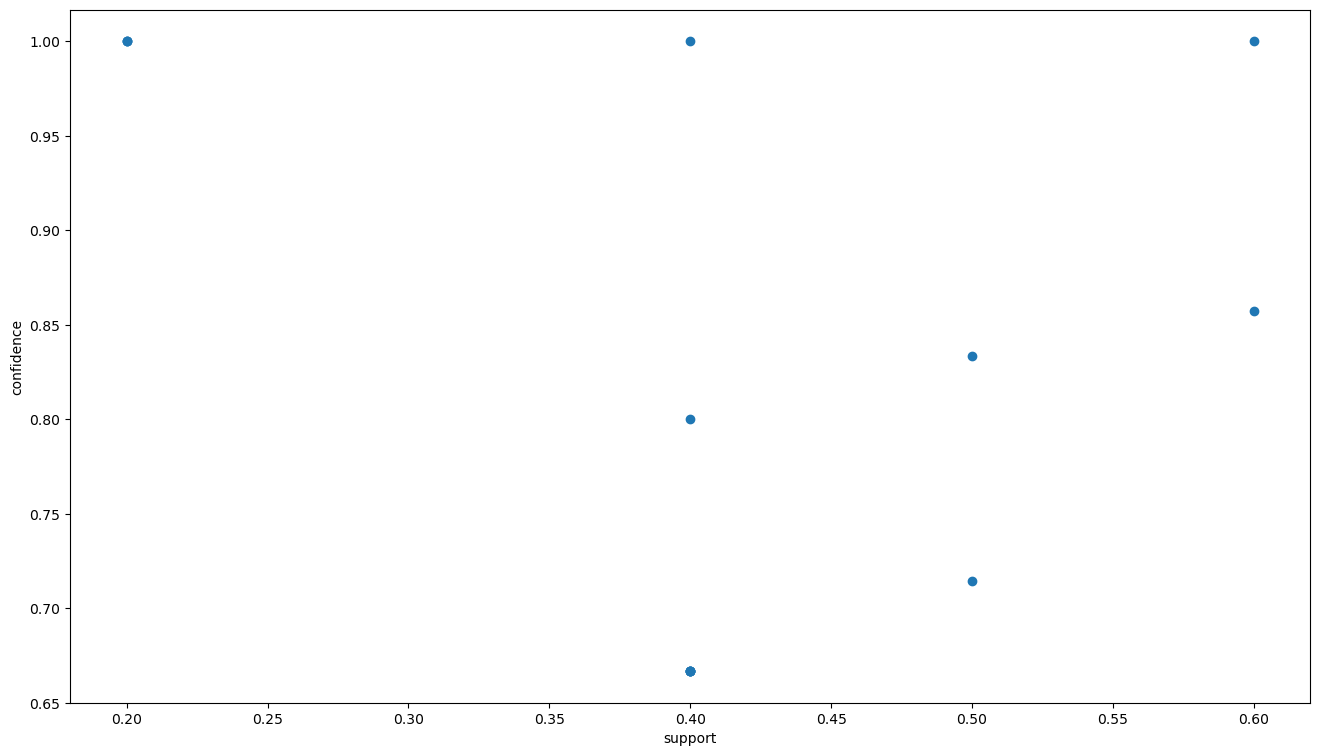

In [57]:
plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

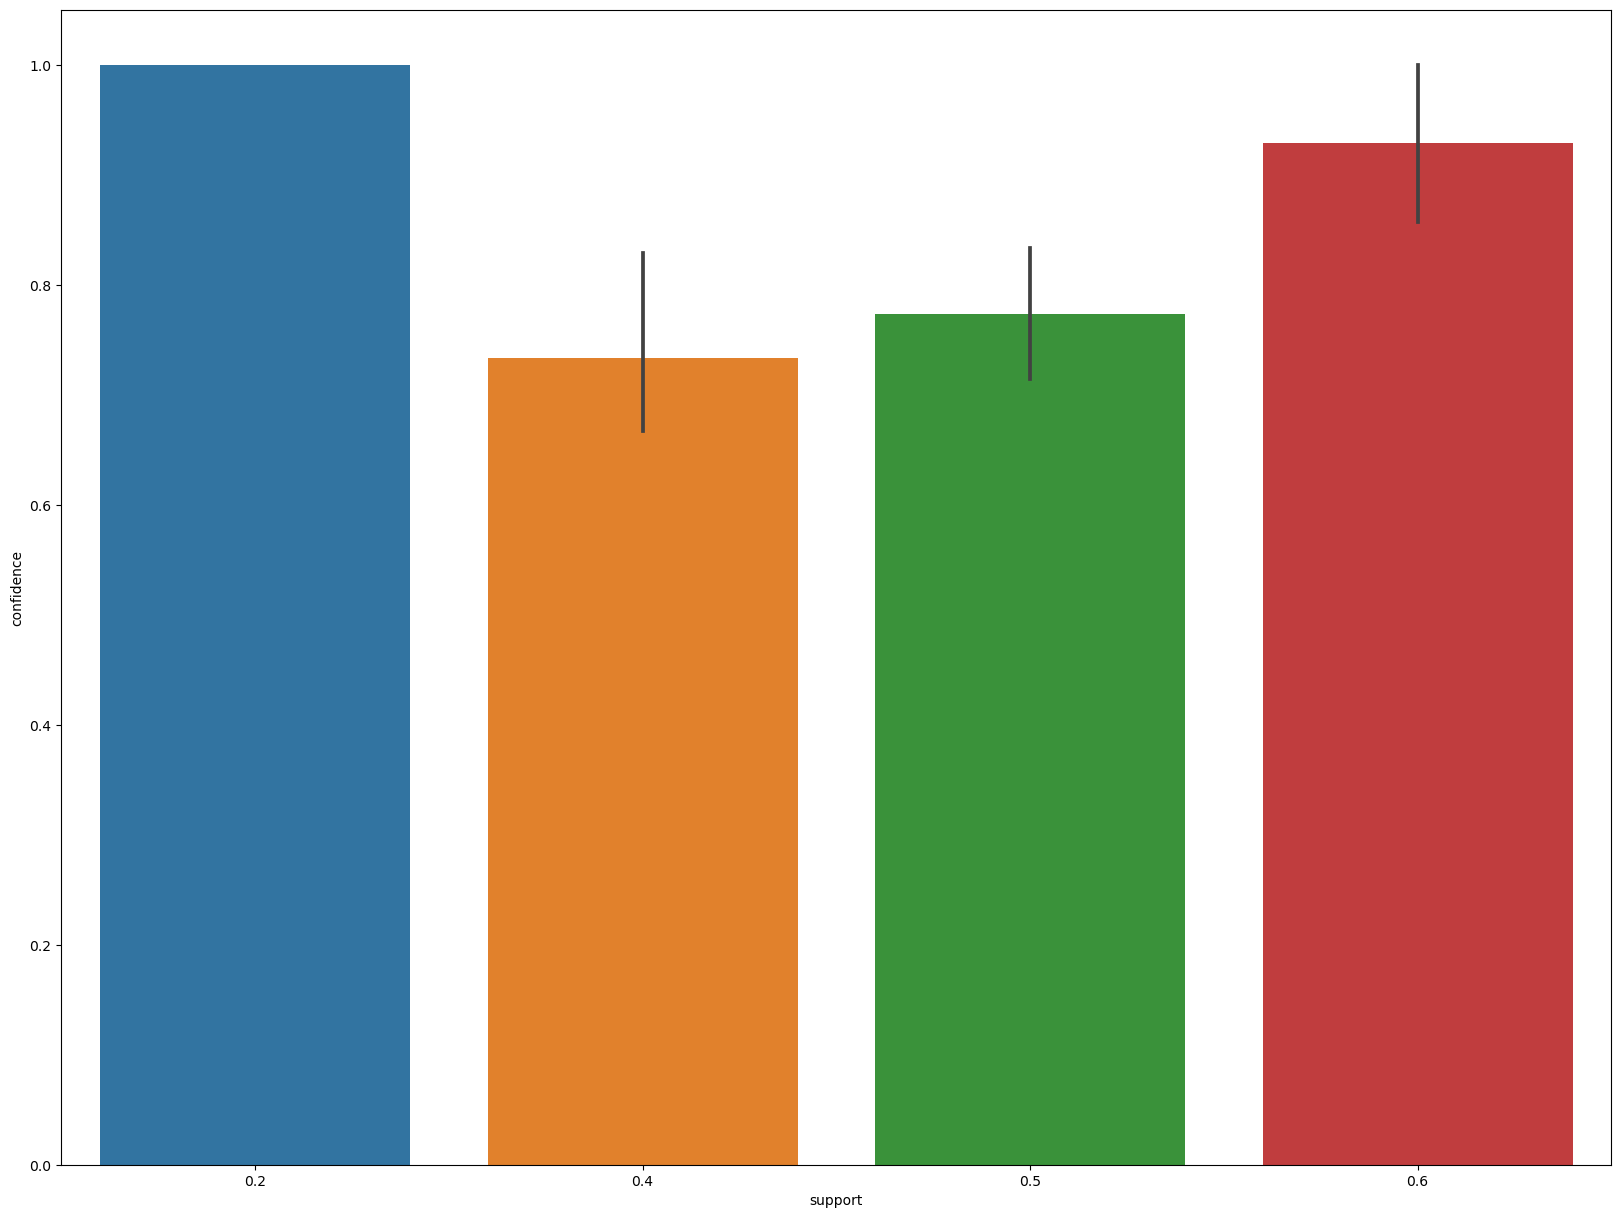

In [58]:
plt.figure(figsize=(20,15))
sns.barplot(x='support', y="confidence",  data=lift);